### Домашнее задание № 1

В папке с домашним заданием находится csv-файл с протеомами четырех разных организмов. 

1. Прочитайте информацию, содержащуюся в файле. Отберите данные для тех четырех организмов, номера которых стоят на против вашей фамилии в файле HW_data.

2. На первом графике постройте 4 ящика с усами для четырех организмов, изображающих одномерные распределения длин белков. Используйте логорифмическую шкалу для большей наглядности. 

3. На втором графике постойте 4 эмпирических функций распределения длин белков для четырех организмов. Используйте логарифмическую шкалу для большей наглядности. 

4. Постройте четыре гистограммы длин белков для четырех разных организмов. Длинна осей x и y должны быть одинаковы на  всех четырех гистограмм. Ширина столбцов гистограмм и расстояния между ними должно быть одинаково. Подберите оптимальное количество столбцов, чтобы гистограммы были наиболее информативны. Используйте логарифмическую шкалу для большей наглядности. 

5. Пользуясь результатами, которые вы получили, и статьей [Zhang (2000)](https://www.cell.com/trends/genetics/fulltext/S0168-9525(99)01922-8), сделайте предположение, на какие две группы можно разделить представленных организмов. Бесплатную версию статьи можно найти на Google Scholar. 

Для выполнения домашнего задания может быть использован любой язык программирования или программа для работы с электронными таблицами. Главное условие - я без особых проблем должен получить результаты у себя на компьютере во время проверки. Мне было бы максимально удобно проверять задание либо в Python, либо в R, в Jupyter Notebook.

### Задание № 1

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

from Bio import SeqIO # a library to read fasta files 

%pylab inline 

import warnings 
warnings.filterwarnings("ignore") # ask python not to return warnings

Populating the interactive namespace from numpy and matplotlib


In [4]:
# set the figure size
pylab.rcParams['figure.figsize'] = (22, 18)
sns.set(font_scale=2)

In [17]:
# get protein names and make a pandas data frame
protein_lengths = pd.read_csv("Protein_Data.csv", index_col=0)
protein_lengths = protein_lengths[
    (protein_lengths["Organism"] == "Organism1") |
    (protein_lengths["Organism"] == "Organism2") |
    (protein_lengths["Organism"] == "Organism5") |
    (protein_lengths["Organism"] == "Organism6")
]

In [18]:
protein_lengths

,Organism,Protein Length
0,Organism1,51
1,Organism1,315
2,Organism1,152
3,Organism1,140
4,Organism1,309
...,...,...
5447,Organism6,912
5448,Organism6,1284
5449,Organism6,742
5450,Organism6,514


### Задание № 2

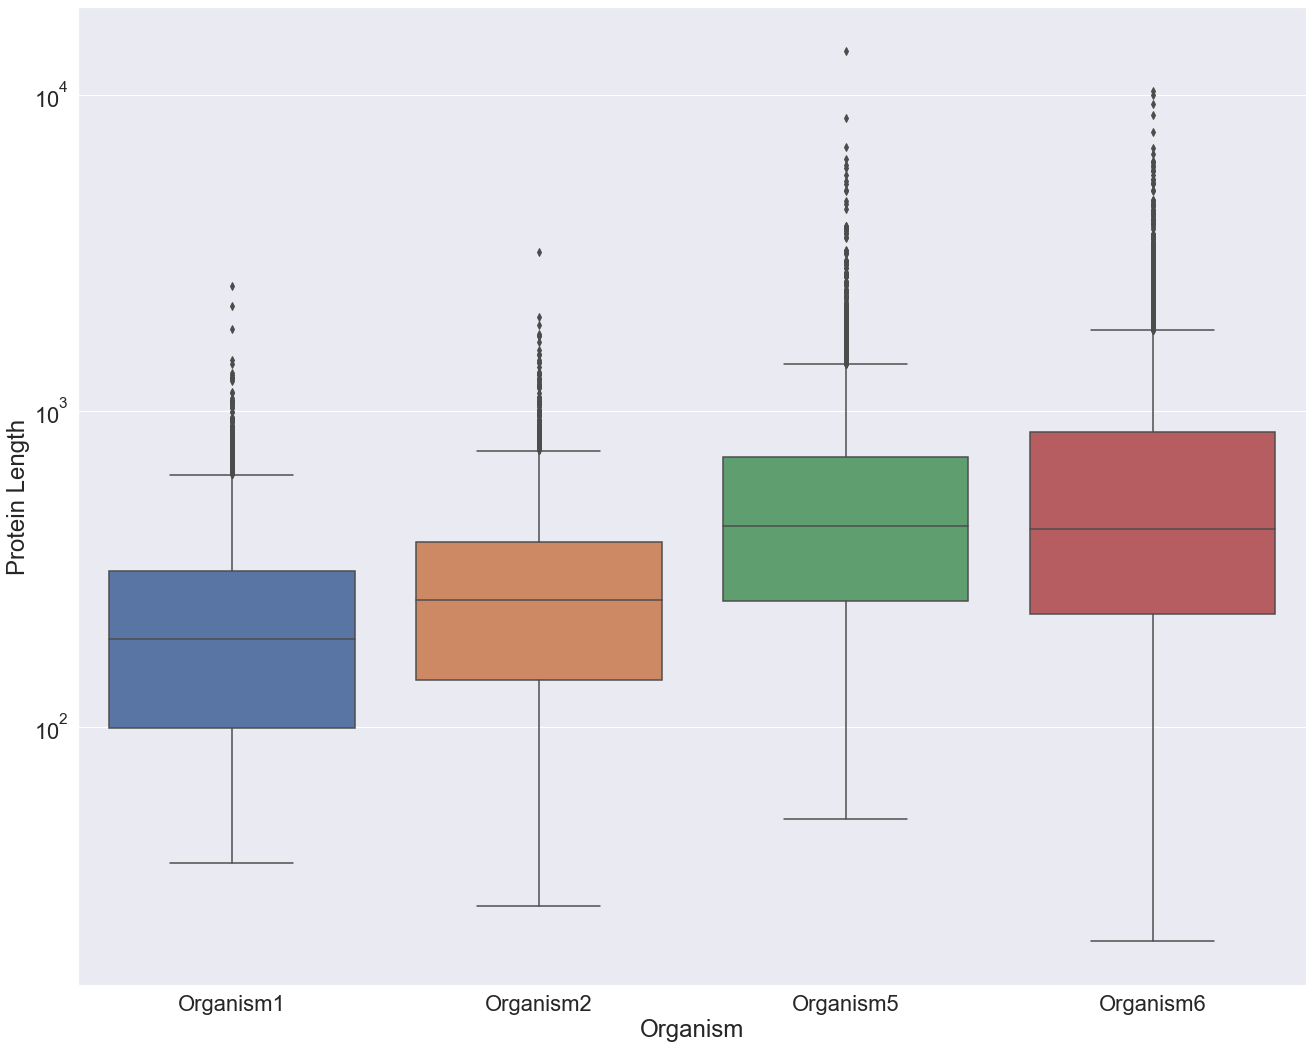

In [19]:
# plot boxplots
f, ax = plt.subplots()
ax.set(yscale="log")
sns.boxplot(x="Organism", y="Protein Length", data=protein_lengths, ax=ax)

### Задание № 3

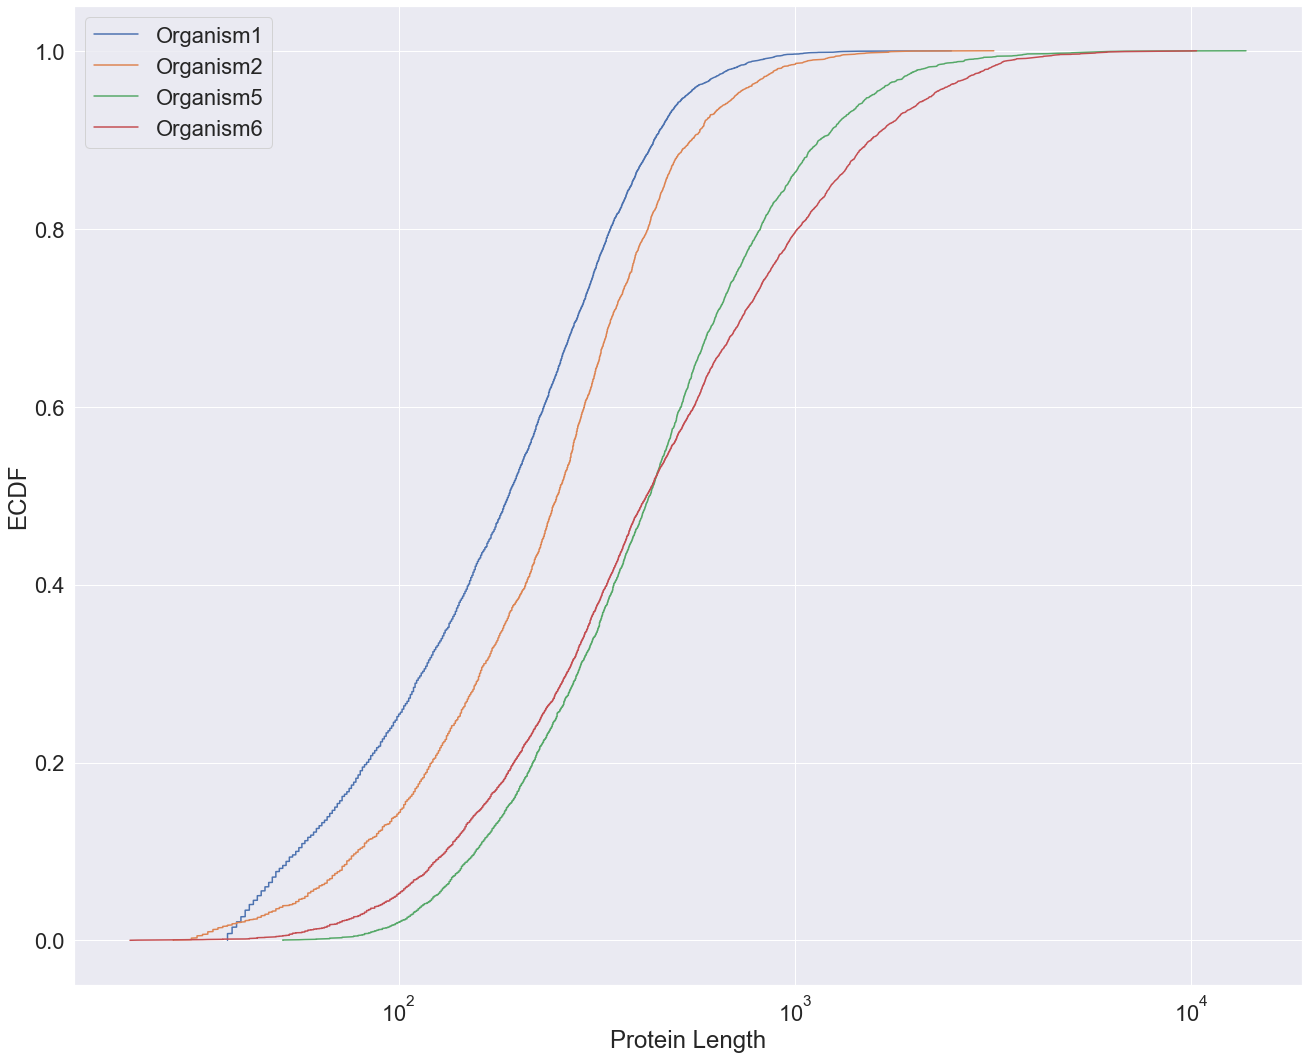

In [20]:
# plot empirical comulative distribution function

f, ax = plt.subplots()
ax.set(xscale="log")
for organism in protein_lengths["Organism"].unique():
    x = np.sort(protein_lengths[protein_lengths["Organism"]==organism]["Protein Length"])
    n = x.size
    y = np.arange(1, n+1) / n
    ax.plot(x, y, label=organism)
plt.legend()
plt.xlabel("Protein Length")
plt.ylabel("ECDF")
plt.show()

### Задание № 4

Text(0, 0.5, 'Number Of Proteins')

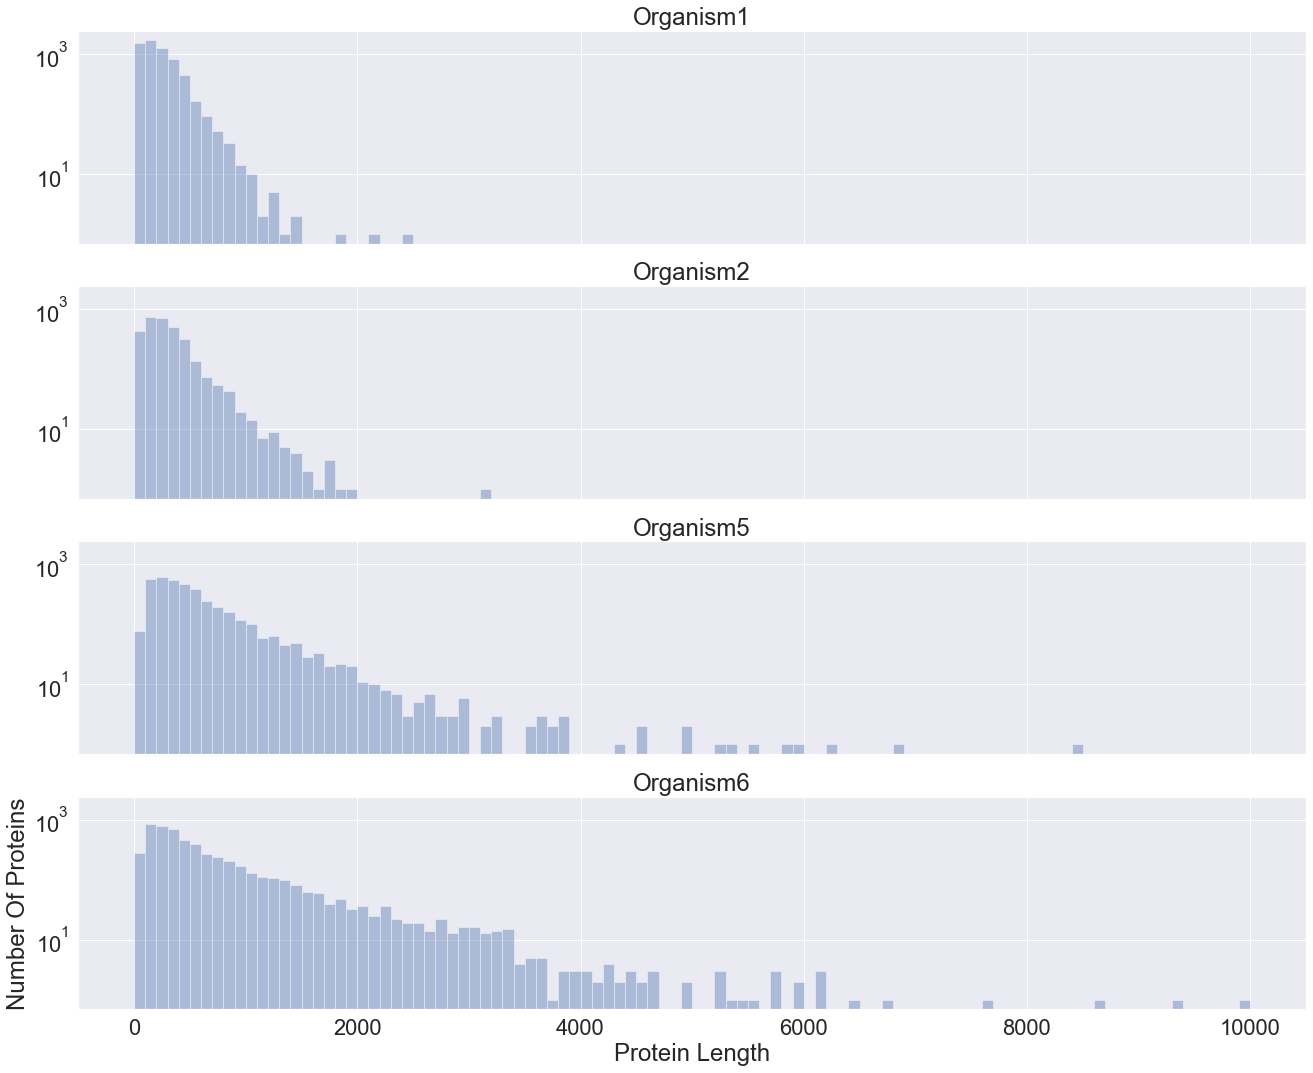

In [21]:
# plot histogram for each organism

# define subplots grid
f, ax = plt.subplots(4, sharex=True, sharey=True)

# add 4 histogramms to the grid
for i, organism in enumerate(protein_lengths["Organism"].unique()):
    ax[i].set(yscale="log")
    sns.distplot(protein_lengths[protein_lengths["Organism"]==organism]["Protein Length"].as_matrix(), 
                bins=100,
                label=organism, 
                kde=False, 
                ax=ax[i],
                hist_kws={"range": [0, 1e4], "label": organism})
    ax[i].set_title(organism)
plt.xlabel("Protein Length")
plt.ylabel("Number Of Proteins")

### Задание № 5

Средние и медианы длин белков у эукариот больше, чем у прокариот. Enterococcus faecalis и Escherichia coli 
относятся к прокариотам, Cryptosporidium hominis и Plasmodium falciparum относятся к эукариотам.